# k-Nearest Neighbors

To make prediction for a new data point, the algorithm finds the closest data points in the training dataset, its closest neighbors.

__Importing libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## k-Neighbors classification

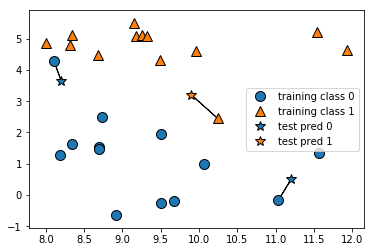

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

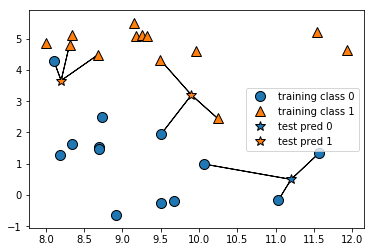

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
from sklearn.model_selection import train_test_split

# creating dataset
X, y = mglearn.datasets.make_forge()

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# neighbors: 1
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [20]:
print("Test set prediction: {}".format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [23]:
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Test set score: 0.857


In [32]:
# neighbors: 3
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print("Test set prediction: {}".format(clf.predict(X_test)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Test set prediction: [1 0 1 0 1 0 0]
Test set score: 0.857


In [44]:
# experiment with n_neighbors parameter
lst = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    print("Score for n_neighbors {0} is {1}".format(i, clf.score(X_test, y_test)))
    lst.append(clf.score(X_test, y_test))

Score for n_neighbors 1 is 0.9020979020979021
Score for n_neighbors 2 is 0.8881118881118881
Score for n_neighbors 3 is 0.9230769230769231
Score for n_neighbors 4 is 0.9230769230769231
Score for n_neighbors 5 is 0.9230769230769231
Score for n_neighbors 6 is 0.9370629370629371
Score for n_neighbors 7 is 0.9300699300699301
Score for n_neighbors 8 is 0.9300699300699301
Score for n_neighbors 9 is 0.916083916083916
Score for n_neighbors 10 is 0.916083916083916


### Analyzing KNeigborsClassifier

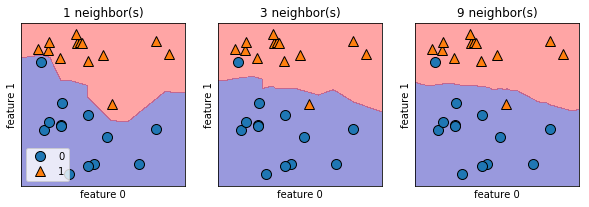

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3);

Smoother boundary corresponds to a simpler model, in other words, using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model complexity.

Now, for breast cancer dataset:

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                    stratify=cancer['target'], random_state=66)

In [38]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

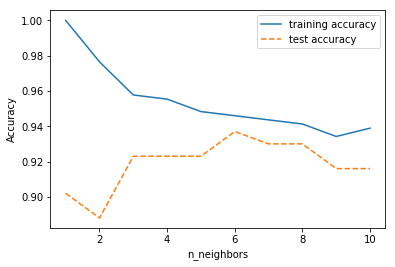

In [43]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, linestyle='dashed', label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();

---

## k-Neighbors Regression

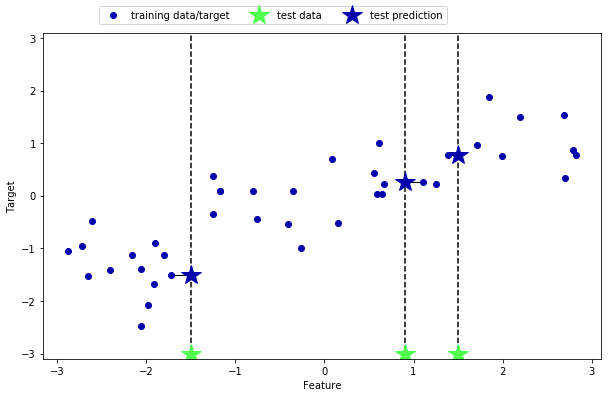

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

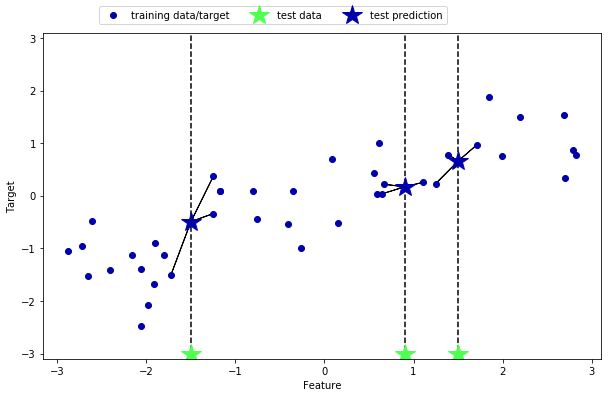

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn.

In [54]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and fit the model
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [55]:
print("Test set predictions: {}".format(reg.predict(X_test)))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [57]:
print("Training set score: {}".format(reg.score(X_train, y_train)))
print("Test set score (R^2): {}".format(reg.score(X_test, y_test)))

Training set score: 0.8194343929538755
Test set score (R^2): 0.8344172446249604


We can also evaluate the model using the score method, which for regressors returns
the R2 score. The R2 score, also known as the coefficient of determination, is a measure
of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses

### Analyzing KNeighborsRegressor

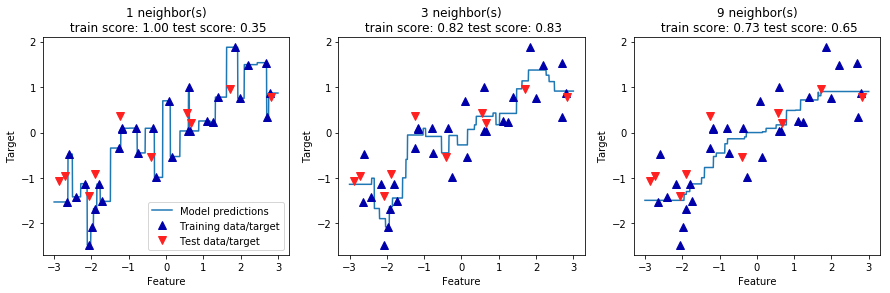

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
# make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

---

## Strengths, weaknesses and parameters

- Two important parameters: n_neighbors and how measure distance between data points.
- One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments.
- In general fast, but if the dataset is massive then it will be slow.
- Good for initial model to consider.
- It does badly with datasets where most features are 0 (sparse dataset).

---

# Important Points

- KNeighbors:
    - important parameters: n_neighbors and distance
    - from sklearn.neighbors
    - easy to understand, but with large dataseet it could be slow
    - good as first model to consider
    - oftenly not used in practice, due to prediction being slow and its inability to handle many features.
- KNeighborsClassifier
    - to classify things: discrete label
    - mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
- KNeighborsRegressor:
    - to classify things: continuous label
    - ax.plot(line, reg.predict(line))

---

# Experimentation

## KNeighborsClassifier:

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# make synthetic dataset
X, y = make_blobs(n_samples=100, n_features=2)

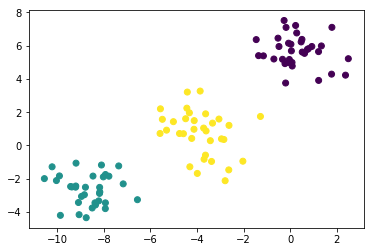

In [61]:
# early visualization
plt.scatter(X[:, 0], X[:, 1], c=y);

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initialize the model
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [63]:
y_pred = clf.predict(X_test)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [66]:
print(clf.predict_proba(X_test)[:6])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


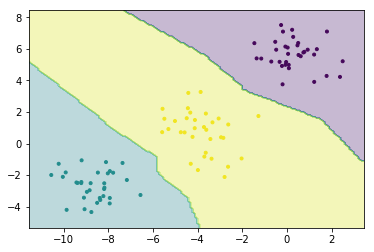

In [65]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='.')
plt.contourf(xx, yy, Z, alpha=0.3)

---

## KNeighborsRegressor

In [75]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1)

In [86]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [87]:
print("Training set score: {}".format(reg.score(X_train, y_train)))
print("Test set score: {}".format(reg.score(X_test, y_test)))

Training set score: 0.9842678300498228
Test set score: 0.8182895980433558
